## KNN Regression for House Price Predection

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import iqr
from sklearn.feature_selection import SelectKBest, f_regression, SequentialFeatureSelector

In [15]:
df = pd.read_csv('../Dataset/kc_house_data.csv')
df =df.select_dtypes("number")
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [17]:
df.filter(df==0, axis=1)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [18]:
df.waterfront.unique()

array([0, 1], dtype=int64)

**data spliting**

In [19]:
data_x = df.drop(columns=["price"])
data_y = df["price"]

**applying KNNRegression model on simple data without any feature eng.**

In [20]:
model_knn = KNeighborsRegressor()
model_knn.fit(data_x, data_y)

KNeighborsRegressor()

In [21]:
cross_val_score(model_knn, data_x, data_y, cv=5, verbose=3, scoring="r2")

[CV] END ................................ score: (test=0.321) total time=   0.4s
[CV] END ................................ score: (test=0.309) total time=   0.1s
[CV] END ................................ score: (test=0.311) total time=   0.1s
[CV] END ................................ score: (test=0.353) total time=   0.1s
[CV] END ................................ score: (test=0.333) total time=   0.1s


array([0.32119434, 0.3090883 , 0.31088257, 0.35304585, 0.33340751])

**Finding best scaller**

In [22]:
scalers = {
    "StandardScaler": StandardScaler,
    "MinMaxScaler": MinMaxScaler,
    "MaxAbsScaler": MaxAbsScaler,
    # "PowerTransformer": PowerTransformer
}

In [23]:
results = []

for name, scaler in scalers.items():
    scaled_data = scaler().fit_transform(data_x)
    knn = KNeighborsRegressor()
    score = cross_val_score(knn, scaled_data, data_y, cv=5, verbose=3, scoring="r2")
    score_mean = np.mean(score)
    score_std = np.std(score)
    print(f"Scaler: {name} \t score_mean: {score_mean} \t score_std: {score_std}", end="\n\n")
    results.append({"Scaler": name, "score_mean": score_mean, "score_std": score_std})

[CV] END ................................ score: (test=0.766) total time=   0.1s
[CV] END ................................ score: (test=0.779) total time=   0.1s
[CV] END ................................ score: (test=0.772) total time=   0.1s
[CV] END ................................ score: (test=0.806) total time=   0.1s
[CV] END ................................ score: (test=0.763) total time=   0.1s
Scaler: StandardScaler 	 score_mean: 0.7770175396876849 	 score_std: 0.015496017782733802

[CV] END ................................ score: (test=0.747) total time=   0.1s
[CV] END ................................ score: (test=0.719) total time=   0.1s
[CV] END ................................ score: (test=0.748) total time=   0.1s
[CV] END ................................ score: (test=0.779) total time=   0.1s
[CV] END ................................ score: (test=0.757) total time=   0.1s
Scaler: MinMaxScaler 	 score_mean: 0.7499770368156616 	 score_std: 0.019232648561758273

[CV] END .

In [24]:
pd.DataFrame(results)

,Scaler,score_mean,score_std
0,StandardScaler,0.777018,0.015496
1,MinMaxScaler,0.749977,0.019233
2,MaxAbsScaler,0.623935,0.020014


**Hyper Tuning the parameter**


In [25]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])

grid = RandomizedSearchCV(pipe, {
    "model__n_neighbors": range(5,30,2),
    "model__weights": ["uniform","distance"],
    "model__leaf_size": range(5,50,5),
    "model__p": [1,2,3,4,5]
}, scoring="r2", cv=5, n_jobs=6, verbose=3)

In [26]:
grid.fit(data_x, data_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', KNeighborsRegressor())]),
                   n_jobs=6,
                   param_distributions={'model__leaf_size': range(5, 50, 5),
                                        'model__n_neighbors': range(5, 30, 2),
                                        'model__p': [1, 2, 3, 4, 5],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   scoring='r2', verbose=3)

In [27]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(leaf_size=20, n_neighbors=13, p=1,
                                     weights='distance'))])

In [28]:
grid.best_score_

0.8148523114372928

In [29]:
grid.best_params_

{'model__weights': 'distance',
 'model__p': 1,
 'model__n_neighbors': 13,
 'model__leaf_size': 20}

**Exploring the heatmap for correlation**

<Axes: >

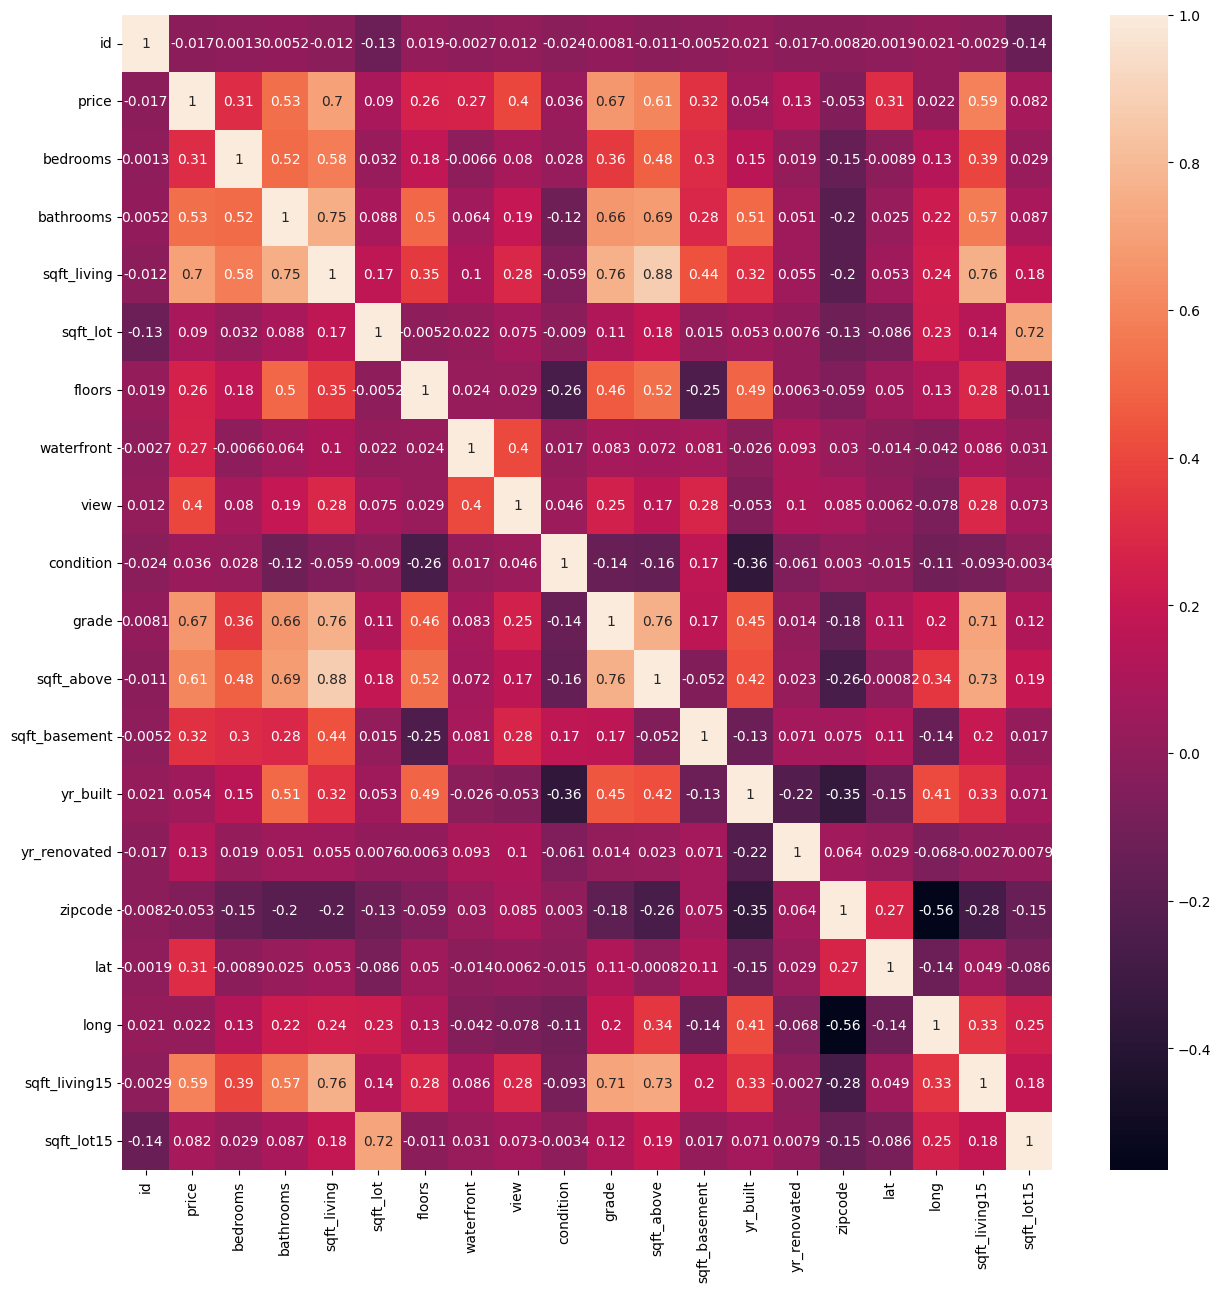

In [30]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.select_dtypes("number").corr(), annot=True)

In [63]:
drop_columns = ["sqft_lot15", "sqft_living15", "sqft_lot", "view", "bathrooms", "condition", "floors", "yr_built", "sqft_basement"]

In [64]:
data_xx = data_x.drop(columns=drop_columns)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor(leaf_size=15, n_neighbors=15, p=1, weights='distance'))
])

score = cross_val_score(pipe, data_xx, data_y, cv=5, scoring='r2', n_jobs=6)
print("score_mean: ", score.mean())
print("score_std: ", score.std())

score_mean:  0.8204032600143613
score_std:  0.008721965244150705


In [68]:
train_x, test_x, train_y , test_y = train_test_split(data_xx, data_y, train_size=0.6)

In [72]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])

grid = RandomizedSearchCV(pipe, {
    "model__n_neighbors": range(10,21,3),
    "model__weights": ["uniform","distance"],
    "model__leaf_size": range(10,21,3),
    "model__p": [1,2,3]
}, scoring="r2", cv=3, n_jobs=6, verbose=3)

In [73]:
grid.fit(train_x, train_y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model', KNeighborsRegressor())]),
                   n_jobs=6,
                   param_distributions={'model__leaf_size': range(10, 21, 3),
                                        'model__n_neighbors': range(10, 21, 3),
                                        'model__p': [1, 2, 3],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   scoring='r2', verbose=3)

In [74]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(leaf_size=16, n_neighbors=10, p=1,
                                     weights='distance'))])

In [75]:
grid.best_params_

{'model__weights': 'distance',
 'model__p': 1,
 'model__n_neighbors': 10,
 'model__leaf_size': 16}

In [76]:
grid.best_score_

0.8202336679473413

In [85]:
train_x, test_x, train_y , test_y = train_test_split(data_x, data_y, train_size=0.6)

In [86]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsRegressor())
])


knn = KNeighborsRegressor(weights="distance", p=1, n_neighbors=10, leaf_size=16)

sfs = SequentialFeatureSelector(knn, n_features_to_select=12, scoring="r2", n_jobs=5, cv=3).set_output(transform="pandas")

In [95]:
stnd = StandardScaler()
stnd.set_output(transform="pandas")
sfs_x = stnd.fit_transform(train_x)
sfs_data = sfs.fit_transform(sfs_x, train_y)

In [98]:
sfs_data.head()

,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
6213,-1.286774,-0.243222,-0.911383,-0.091645,-1.408377,-1.083178,-1.015824,0.895753,-0.197363,-1.125175,-1.515299,-0.276266
2614,0.080766,-0.136193,-0.911383,-0.091645,0.286276,0.440085,-0.064709,-1.308421,0.214634,0.717558,1.211350,-0.120609
3874,-1.200630,-0.183799,-0.911383,-0.091645,-2.255703,-1.466992,-1.729159,1.642931,-0.669864,-0.934547,-0.917478,-0.199632
8119,-0.467327,0.073503,-0.911383,-0.091645,-1.408377,-0.170419,-0.845982,-0.150296,-0.694353,-1.746479,-0.698762,2.690465
14044,0.576095,-0.146815,0.937186,-0.091645,0.286276,0.991818,0.852436,-0.841435,0.958678,0.075072,0.365652,-0.198754


In [96]:
pipe = Pipeline([
    ("model", KNeighborsRegressor(leaf_size=15, n_neighbors=15, p=1, weights='distance'))
])

score = cross_val_score(pipe, sfs_data, train_y, cv=5, scoring='r2', n_jobs=6)
print("score_mean: ", score.mean())
print("score_std: ", score.std())

score_mean:  0.8471947267324413
score_std:  0.013040405214010486


In [94]:
train_x.shape

(12967, 19)